# Neptune Quickstart

<a target="_blank" href="https://colab.research.google.com/drive/1JDVMQ7ECSH8zhwMAhroC03CK4r2q1KTr?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>


This guide will show you how to:
- Create a Neptune Run object
- Log training metrics to Neptune

## Install Neptune and Dependencies

In [ ]:
! pip install -q -U neptune_scale

Import required packages

In [116]:
from random import random, randint
import numpy as np
from neptune_scale import Run
import time

## Get and Set your API token

To find your API token and full project name:
1. Log into Neptune Scale
2. In the bottom-left corner, expand your user menu and select **Get your API token**
3. Copy the API token and paste it below to set as an environment variable
4. Paste your project name to set as an environment variable

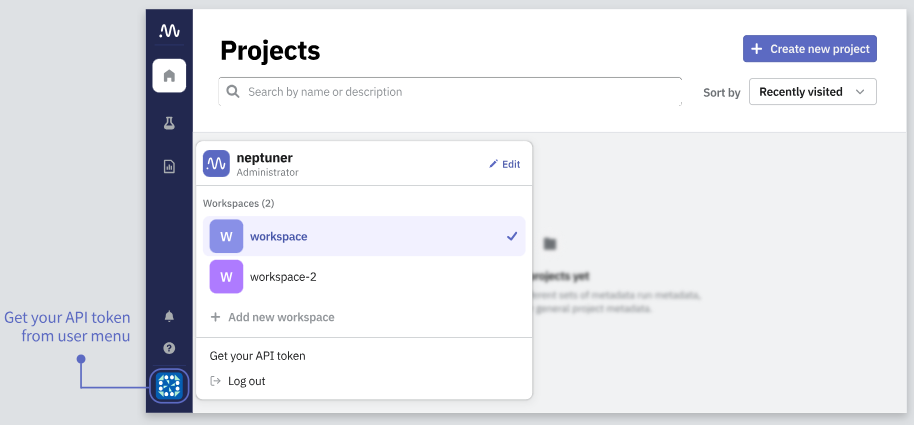

Paste your API token, workspace and project name below and execute the cell block.

In [ ]:
# Set environment variable for the API token
%env NEPTUNE_API_TOKEN = "your_api_token"
%env NEPTUNE_PROJECT = "workspace_name/Quickstart"

env: NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vc2NhbGUubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3NjYWxlLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiMGIyNGUwYzMtMDg2Ni00YTZlLWIyYTctZDUxN2I4ZjE5MzA1In0="
env: NEPTUNE_PROJECT="leo/Quickstart"


## Initialize the Neptune Run object

To initialize the `Run` object, you need to provide a unique `run_id` to identify your experiment. The `Run` method can also be used to set your `api_token` and `workspace/project_name`, but these have already been set as environment variables. 

```python
run = Run(
    run_id=f"seagull-{custom_id}", # You must specify a unique custom run_id
)
```

In the code block below, insert your personal API token as well as your workspace and project name.
_Note - we recommend [setting environment variables](https://docs-beta.neptune.ai/setup#save-credentials-as-env-variables) for your API token and project name._

In [134]:
custom_id = random() # sets a random value for the custom run_id

run = Run(
    run_id=f"seagull-{custom_id}", # You must specify a unique custom run_id
)

# Add any tags to identify your runs
run.add_tags(["Quickstart", "Long"])
run.add_tags(["Notebook"], group_tags=True)

run.log_configs(
    {
        "parameters/use_preprocessing": True,
        "parameters/learning_rate": 0.002,
        "parameters/batch_size": 64,
        "parameters/optimizer": "Adam",
        "parameters/offset": random()
    }
)

## Execute Training Loop that Logs to Neptune

This training loop tracks **66** different training metrics each for **20000** steps. In this example you can increase the number of metrics, in the logging dictionary as well as the number of steps. 

```python
metrics_to_log = {
    "metric_1": metric_1,
    ... ,
    "metric_x": metric_x
}

```

Once the training is complete, you can navigate to the [`Runs Table`](https://scale.neptune.ai/leo/Quickstart/runs/table) in the Neptune Scale Web App. Click on the _Show all runs_ button to show the runs that you have just logged, as seen below.

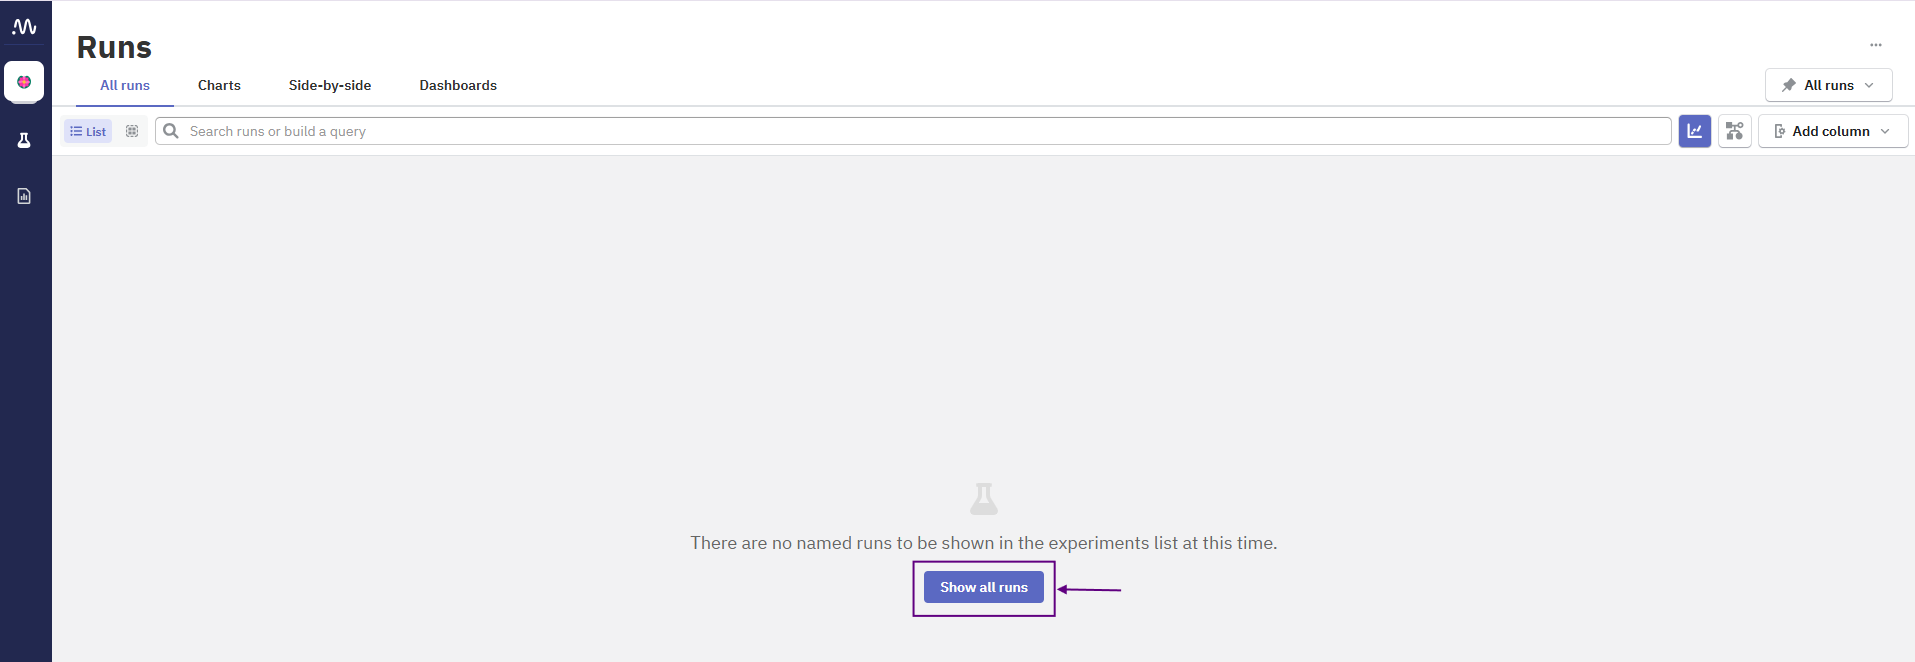

In [135]:
steps = 20000 # Specify number of steps
start_time = time.time() # Time length of execution
logging_time = 0

# Simulate the training loop
random_int = randint(0, 100)
print(random_int)

for step in range(1, steps + 1):

    relative_progress = step/steps
    noise = np.random.uniform(-0.3, 0.3) * (1 - relative_progress + random_int) / random_int
    randomness = np.random.uniform(0.0000001, 1)
    # Specify data to log per step as a dictionary
    metrics_to_log = {
        "train/metrics/accuracy":       1 - 1 / np.log(relative_progress * (random_int + np.random.uniform(-10, 10)) + 1.1) - random() / step + noise,
        "train/metrics/loss":           1 / np.log(step/1000 + 2) + random() / step + noise,
        "validation/metrics/accuracy":  1 - 1 / np.log(step/1000 + 2) - random() / step - np.random.uniform(-0.3, 0.3),
        "validation/metrics/loss":      1 / np.log(step/2000 + 2) + random() / step + np.random.uniform(-0.3, 0.3),
        "test/metrics/accuracy":        1 - 1 / np.log(step/1000 + 2) - random() / step - np.random.uniform(-0.3, 0.3),
        "test/metrics/loss":            1 / np.log(step/3000 + 2) + random() / step + np.random.uniform(-0.3, 0.3),
    }

    # Loop metrics to create unique values for each layer and GPU
    for i in range(1, 31): # for each layer and each GPU
        metrics_to_log[f"debug/weights/layer_{i}"] = np.random.uniform(-0.1, 0.1)
        metrics_to_log[f"hardware/gpu_{i}"] = random()

    logging_time_start = time.time()
    # Log metrics usig the log_metrics() method
    run.log_metrics(
        data = metrics_to_log,
        step = step,
    )
    logging_time_end = time.time()
    logging_time += logging_time_end - logging_time_start
# Close run and ensure all operations are processed
run.close()

# Calcualte some post run metrics for review
num_ops = steps * len(metrics_to_log)
end_time = time.time()
execution_time = end_time - start_time

print(f"Unique metrics per run: {len(metrics_to_log)}")
print(f"Number of steps per run: {steps}")
print(f"Total data points logged per run: {num_ops}")
print(f"Total execution time: {execution_time:.2f} seconds to process {num_ops} operations ({num_ops/execution_time:.0f} datapoints/second).")
print(f"Logging time {logging_time}, ({num_ops/logging_time:.0f} datapoints/second).")

77


neptune:INFO: Waiting for all operations to be processed
neptune:WARNING: No timeout specified. Waiting indefinitely
neptune:INFO: Waiting for remaining 19126 operation(s) to be processed
neptune:INFO: Waiting for remaining 11578 operation(s) to be processed
neptune:INFO: Waiting for remaining 6250 operation(s) to be processed
neptune:INFO: Waiting for remaining 40 operation(s) to be processed
neptune:INFO: All operations were processed


Unique metrics per run: 66
Number of steps per run: 20000
Total data points logged per run: 1320000
Total execution time: 35.19 seconds to process 1320000 operations (37506 datapoints/second).
Logging time 6.833186626434326, (193175 datapoints/second).
